In [200]:
import pandapower as pp
import pandapower.networks as nw
import numpy as np

In [201]:
net = nw.case118()

In [202]:
net

This pandapower network includes the following parameter tables:
   - bus (118 elements)
   - load (99 elements)
   - gen (53 elements)
   - shunt (14 elements)
   - ext_grid (1 element)
   - line (173 elements)
   - trafo (13 elements)
   - poly_cost (54 elements)
   - bus_geodata (118 elements)

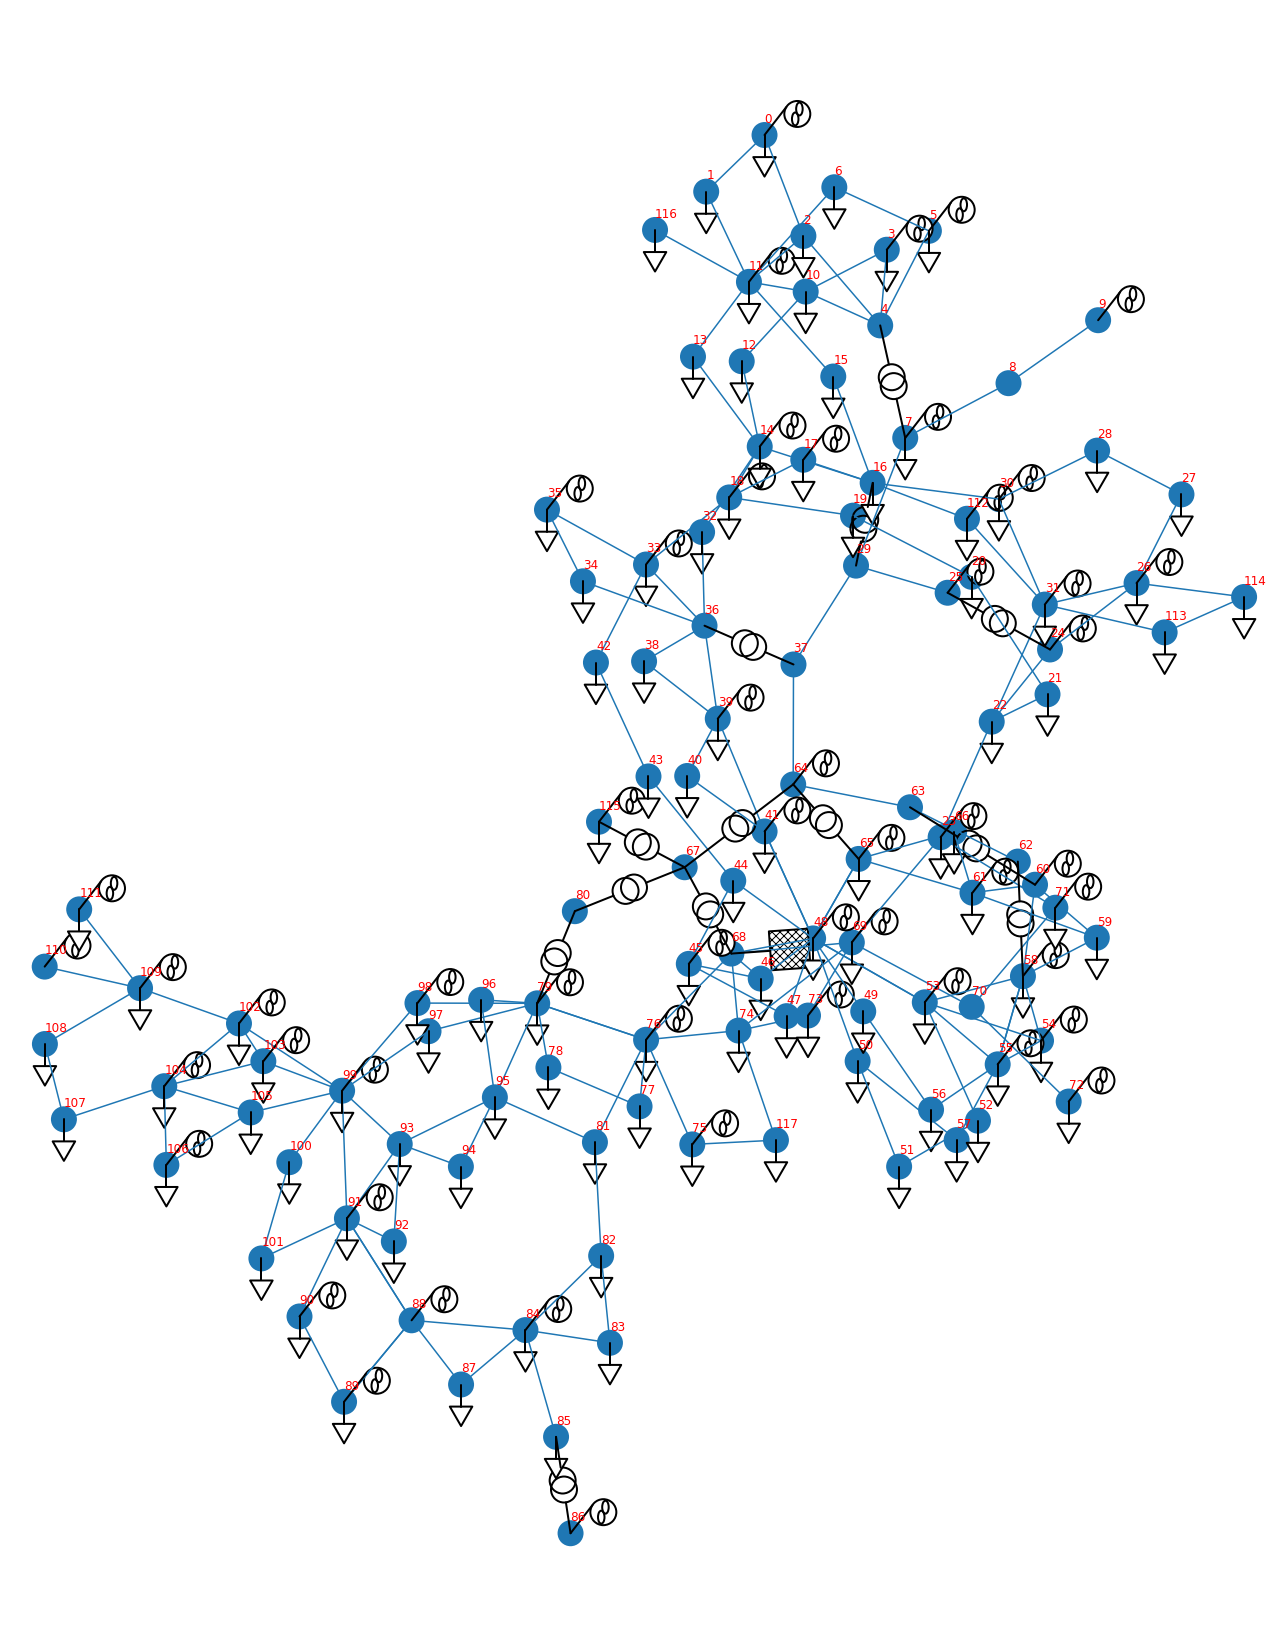

In [203]:
import matplotlib.pyplot as mpl
import numpy as np

import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as plt
from pandapower.plotting import get_collection_sizes

net = nw.case118()

def plot_net(net, ax=None):
    if ax is None:
        fig, ax = mpl.subplots(1, 1, figsize=(18, 23))

    sizes = get_collection_sizes(net)

    # create collections for elements
    collections = list()
    collections.append(plt.create_bus_collection(net, size=sizes["bus"]))
    collections.append(plt.create_line_collection(net, use_bus_geodata=True))
    collections.append(plt.create_trafo_collection(net, size=sizes["trafo"]))
    collections.append(plt.create_ext_grid_collection(net, size=sizes["ext_grid"], orientation=1.5))
    collections.append(plt.create_gen_collection(net, size=sizes["gen"], orientation=1))
    collections.append(plt.create_bus_bus_switch_collection(net, size=sizes["switch"]))
    collections.append(plt.create_line_switch_collection(net, distance_to_bus=sizes["switch_distance"], size=sizes["switch"]))
    collections.append(plt.create_load_collection(net, size=sizes["load"]))

    # add labels for each bus
    for idx in net.bus_geodata.index:
        x = net.bus_geodata.loc[idx, "x"]
        y = net.bus_geodata.loc[idx, "y"] + sizes["bus"] * 1.
        ax.text(x, y, str(idx), fontsize=12, color="r")

    plt.draw_collections(collections, ax=ax)
    mpl.tight_layout()
plot_net(net)

In [204]:
print(f"Initial condition Capacity in MW : {net.gen.max_p_mw.sum()}")

Initial condition Capacity : 9161.0


In [205]:
print(f"Initial condition Load in MW : {net.load.p_mw.sum()}")

Initial condition Load in MW : 4242.0


In [206]:
pp.runpp(net)

In [210]:
print(f"Lines greater than 4% loading percent: \n{net.res_line.loading_percent.loc[net.res_line.loading_percent>4.]}")

Lines greater than 4% loading percent: 
6    4.475087
7    4.356763
Name: loading_percent, dtype: float64


In [211]:
#Modifying 118 Bus
net_118 = nw.case118()

In [212]:
#Dropping Gen (Reduce capacity)
net_118.gen.drop(index = [1,3,6,8,9,12,14,16,18,20,22,23,29,31,32,33,39,40,41,44,45,47,48,49,51], inplace = True)

In [213]:
#Reducing Capacity further
net_118.gen.loc[net_118.gen.max_p_mw ==100., "max_p_mw"] = 85.

In [214]:
#Reducing the capacity of large generators
net_118.gen.loc[[4,25,27,28,35,38,43], "max_p_mw"] = [270,180,240,120,300,250,200]

In [215]:
#Reducing the capacity of slack bus Gen - External Grid
net_118.ext_grid.loc[0,'max_p_mw'] = 500

In [216]:
#Keeping the current generation less than the max generation of selected bus after modifying (Not important for OPF)
net_118.gen.loc[[4,25,27,28,35,38,43],'p_mw']=[150,50,91,92,177,107,92]

In [217]:
#Overview of the network
net_118

This pandapower network includes the following parameter tables:
   - bus (118 elements)
   - load (99 elements)
   - gen (28 elements)
   - shunt (14 elements)
   - ext_grid (1 element)
   - line (173 elements)
   - trafo (13 elements)
   - poly_cost (54 elements)
   - bus_geodata (118 elements)

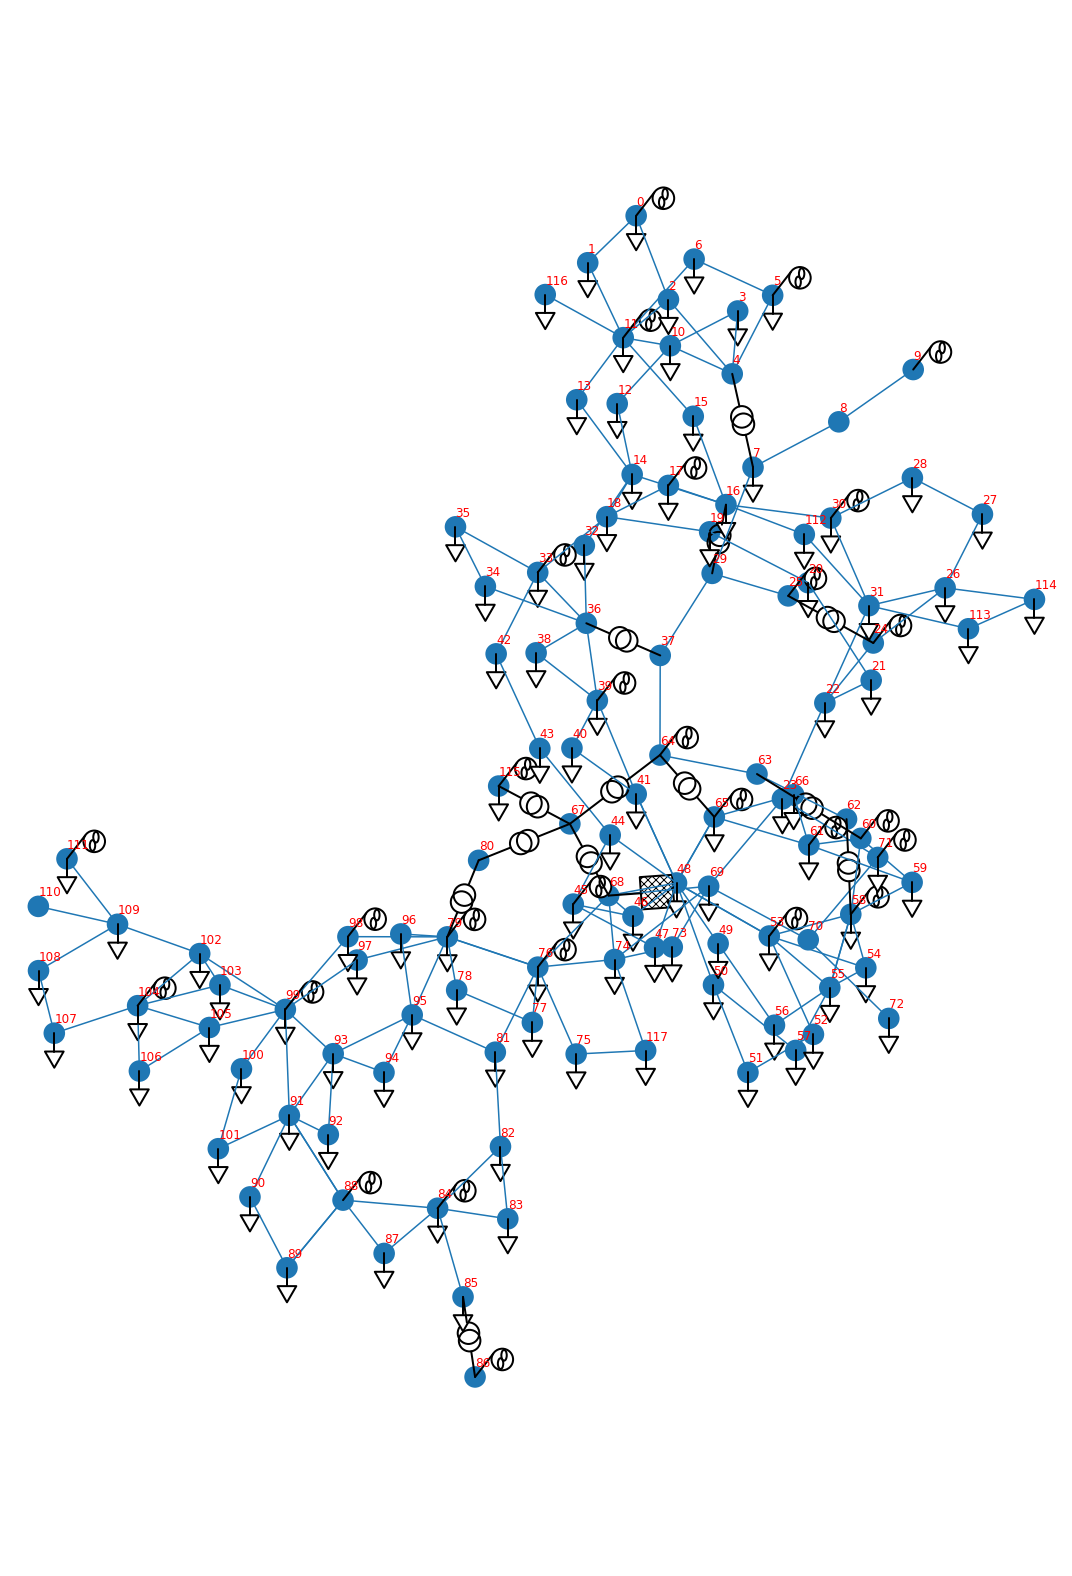

In [240]:
#Plotting the modified IEEE 118 Bus system

import matplotlib.pyplot as mpl
import numpy as np

import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as plt
from pandapower.plotting import get_collection_sizes

def plot_net_118(net_118, ax=None):
    if ax is None:
        fig, ax = mpl.subplots(1, 1, figsize=(15, 22))

    sizes = get_collection_sizes(net_118)

    # create collections for elements
    collections = list()
    collections.append(plt.create_bus_collection(net_118, size=sizes["bus"]))
    collections.append(plt.create_line_collection(net_118, use_bus_geodata=True))
    collections.append(plt.create_trafo_collection(net_118, size=sizes["trafo"]))
    collections.append(plt.create_ext_grid_collection(net_118, size=sizes["ext_grid"], orientation=1.5))
    collections.append(plt.create_gen_collection(net_118, size=sizes["gen"], orientation=1))
    collections.append(plt.create_bus_bus_switch_collection(net_118, size=sizes["switch"]))
    collections.append(plt.create_line_switch_collection(net_118, distance_to_bus=sizes["switch_distance"], size=sizes["switch"]))
    collections.append(plt.create_load_collection(net_118, size=sizes["load"]))

    # add labels for each bus
    for idx in net_118.bus_geodata.index:
        x = net_118.bus_geodata.loc[idx, "x"]
        y = net_118.bus_geodata.loc[idx, "y"] + sizes["bus"] * 1.
        ax.text(x, y, str(idx), fontsize=12, color="r")

    plt.draw_collections(collections, ax=ax)
    mpl.tight_layout()
plot_net_118(net_118)

In [228]:
#Checking Capacity and Load of the modified system
gen_cap = net_118.gen.max_p_mw.sum()
slack_cap = net_118.ext_grid.max_p_mw.sum()
Total_cap = gen_cap + slack_cap
print(f"Modified Capacity in MW : {Total_cap}")
print(f"Load in MW : {net_118.load.p_mw.sum()}")
print('Reserve is around 15-18 %')

Modified Capacity in MW : 4817.0
Load in MW : 4242.0
Reserve is around 15-18 %


In [226]:
#Increasing quadratic cost for slack gen
net_118.poly_cost.loc[22,'cp2_eur_per_mw2'] = 0.6

In [229]:
#Increasing line loading
net_118.line.loc[net_118.line.max_i_ka > 41.41, "max_i_ka"] = 0.55

In [233]:
#Increasing line loading
net_118.line.loc[net_118.line.max_i_ka > 15, "max_i_ka"] = 0.47

In [234]:
#Modifying line loading for selected lines based on PF
net_118.line.loc[[29,30],'max_i_ka'] = [0.91,0.60]

In [235]:
#Running a NR PF (Need this for Jacobian)
pp.runpp(net_118) 

In [238]:
#Running DC PF
pp.rundcopp(net_118) 

In [239]:
#Checking critical lines
net_118.res_line.loading_percent.loc[net_118.res_line.loading_percent>80.]

6      96.136030
7      96.136030
29    100.000000
30     97.740494
34    100.000000
49     88.941996
Name: loading_percent, dtype: float64

Reduced to 28 Gens from 55 Gens.

We can see from the above result that we are able to produce critical lines to perform our operations. Previously, the max loading percent was only about 3-4% and it increased upto 100% for some lines now.

Contingency and other analysis will be performed later.